Please note that the word `derivative` has a different meaning in calculus (mathematics) and finance:
- In calculus, the derivative of function $\,f\,$ is obtained by the differentiation of $\,f\,$.
- In finance, derivative means a product derived from one or more underlying assets.

### Futures and Forwards

Their names are: one `futures` contract, one `forward` contract.

Both are contracts for a selected underlying asset to be delivered at a fixed future time.

Please see the section `Key takeaways` at<br/>
https://www.investopedia.com/ask/answers/06/forwardsandfutures.asp

#### Forward

Owning a `forward` contract `on an underlying asset` at time $\,T>0\,$ means having the
<br/>
contractual obligation to buy the underlying asset for the price $\,K\,$ which was fixed at time $\,t=0\,$.

Let $\,S\,\left(\,t\,\right)\,$ denote the price of the underlying asset at time $\,t\,$,
and let $\,S_{\,0}\,$ denote $\,S\,\left(\,t=0\,\right)\,$.


If the following are all true:
* there are no transaction costs, no taxes or other fees, and the underlying asset has no dividends
* arbitrary small amounts of the underlying can be purchased
* the risk-free rate from $\,t=0\,$ until time $\,T\,$ is the constant $\,r\,$ continuously compounded rate
* there is no arbitrage
* the asset has no storage costs

then at time $\,t=0\,$ the `underlying asset's expected price` for time $\,T\,$ is $\,K=S_{\,0} \,\exp\,\left(\,r\,T\,\right)\,$.

#### Forward payoff

At time $\,T\,$ the price of the underlying asset is $\,S_{\,T}\,$, which is usually different from $\,K\,$.
<br/>
So if you own a forward contract on this underlying, then at time $\,T\,$ you will pay $\,K\,$ for something that has a value of $\,S_{\,T}\,$.

Consequently, your balance will be $\,S_{\,T} - K\,$ when purchasing the asset at time $\,T\,$ for the pre-determined price $\,K\,$.

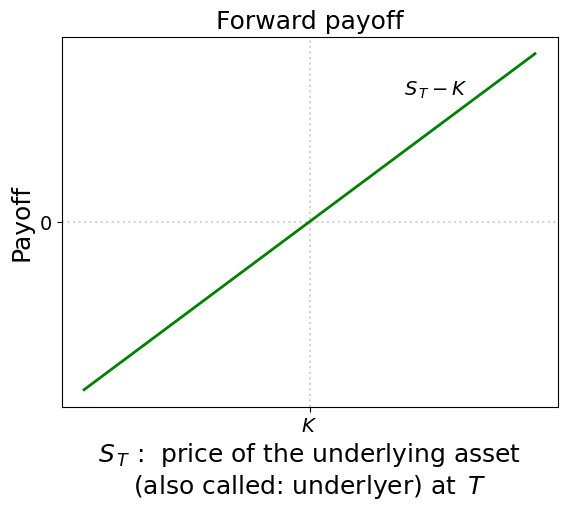

In [1]:
import numpy as np
import matplotlib.pyplot as plt

FONTSIZE = 14
FONTSIZE_BIG = 18
LINEWIDTH = 2


def plot_forward_payoff():
    """
    Plot payoff function of a forward contract
    """

    K = 1.0  # agreed forward price
    underlyer_values = np.linspace(0.0, 2.0 * K)
    payoff = [S - K for S in underlyer_values]
    
    plt.axhline(0, c='lightgray', ls='dotted')
    plt.axvline(K, c='lightgray', ls='dotted')
    plt.plot(underlyer_values, payoff, color='g', linewidth=LINEWIDTH)
    plt.xticks([K], ['$K$'], fontsize=FONTSIZE)
    plt.yticks([0], ['0'], fontsize=FONTSIZE)
    plt.xlabel((r'$S_{\,T}$ :  price of the underlying asset'
               '\n(also called: underlyer) at $\,T\,$'), fontsize=FONTSIZE_BIG)
    plt.ylabel(r'Payoff', fontsize=FONTSIZE_BIG)
    plt.title('Forward payoff', fontsize=FONTSIZE_BIG)
    plt.text(1.7 * K, 0.75 * K, r'$S_{\,T} - K$', horizontalalignment='right', fontsize=FONTSIZE)
    plt.show()


plot_forward_payoff()

<span style="background:#ffb2b2"><b>$\Rightarrow$ Note: The horizontal axis is <u>not</u> time, but it is the price of the underlying asset at maturity ( time $\,T\,$) .</span></b>

### Swaps

* A swap is a forward contract that specifies at time $\,t=0\,$ the two (series of) assets that will be exchanged in the future.
* Its most common form is an `interest rate swap` when two future series of interest cash flows are exchanged:
  * Payer pays fixed rate.
  * Receiver pays floating rate. A reference floating rate is the [SOFR (Secured Overnight Financing Rate)](https://www.newyorkfed.org/markets/reference-rates/sofr).

Let us watch this 1-minute video together and discuss:<br/>
https://www.investopedia.com/terms/i/interestrateswap.asp

### Call Option

1. The payoff of a call option depends on the price of the underlying asset, $\,S\,\left(\,t\,\right)\,$.
2. To purchase this product, you pay a `fixed fee` at time $\,t=0\,$. This fixed fee is called the `option premium`.
3. At time $\,t=T\,$ (maturity) you will receive the below plotted payoff as a function of $\,S\,\left(\,T\,\right)\,$.
4. The payoff function has one parameter: the strike price, which is usually denoted by $\,K\,$, or sometimes $\,X\,$.

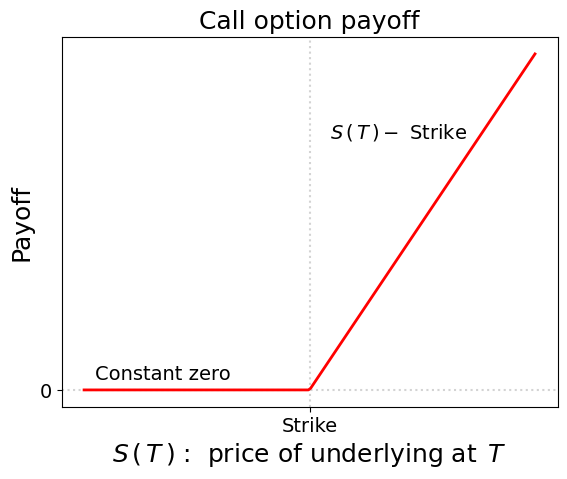

In [2]:
import numpy as np
import matplotlib.pyplot as plt

FONTSIZE = 14
FONTSIZE_BIG = 18
LINEWIDTH = 2


def plot_call_payoff():
    """Plot payoff function of call option"""
    strike = 1.0   # strike price
    underlying_values = np.linspace(0.0, 2.0 * strike, num=200)
    payoff = [0.0 if S < strike else S - strike for S in underlying_values]
    
    plt.axhline(0, c='lightgray', ls='dotted')
    plt.axvline(strike, c='lightgray', ls='dotted')
    plt.plot(underlying_values,payoff, color='r', linewidth=LINEWIDTH)
    plt.xticks([strike], ['Strike'], fontsize=FONTSIZE)
    plt.yticks([0], ['0'], fontsize=FONTSIZE)
    plt.xlabel(r'$S\,\left(\,T\,\right)$ :  price of underlying at $\,T\,$', fontsize=FONTSIZE_BIG)
    plt.ylabel(r'Payoff', fontsize=FONTSIZE_BIG)
    plt.title('Call option payoff', fontsize=FONTSIZE_BIG)
    plt.text(0.05 * strike, 0.03 * strike, 'Constant zero', fontsize=FONTSIZE)
    plt.text(1.7 * strike, 0.75 * strike, r'$\,S\,\left(\,T\,\right) -$ Strike', 
             horizontalalignment='right', fontsize=FONTSIZE)
    plt.show()


plot_call_payoff()

#### What does it mean to be on the long side of a call option ?

As an example, assume that Albert sells (writes) a call option to Berta. In this case
* Albert is the seller (writer) of this call option and Berta is the buyer.
* Albert is on the **short side** of this call option, and Berta is on the **long side**. 

#### Task: Plot together a Long Call payoff and a Short Call payoff

Please draw together on the same graph (on a piece of paper) a Long Call payoff and a Short Call payoff.

### Put Option

If at $\,T\,$ (the contract's maturity) the price of the underlying is below the strike, then the owner of the put option receives the difference.

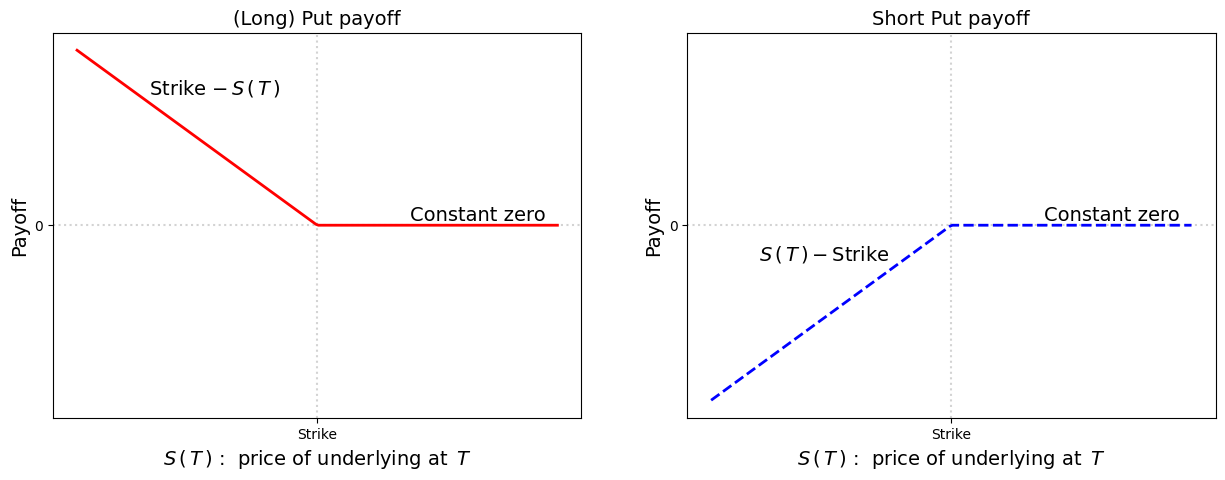

In [3]:
import numpy as np
import matplotlib.pyplot as plt

FONTSIZE = 14
FONTSIZE_BIG = 14
LINEWIDTH = 2
TICKS_FONTSIZE = 14
STRIKE = 1.0   # strike price
YLIM = (-1.1 * STRIKE, 1.1 * STRIKE)


def plot_put_payoff():
    """Plot payoff function of Long Put and Short Put"""

    underlying_values = np.linspace(0.0, 2.0 * STRIKE, num=200)
    long_put_payoff = np.array([STRIKE - S if S < STRIKE else 0.0 for S in underlying_values])
    short_put_payoff = (- 1.0) * long_put_payoff

    fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
    for xtick_ytick in ['xtick', 'ytick']:
        plt.rc(xtick_ytick, labelsize=TICKS_FONTSIZE)

    # (Long) Put Payoff
    ax = axes[0]
    ax.axhline(0, c='lightgray', ls='dotted')
    ax.axvline(STRIKE, c='lightgray', ls='dotted')
    ax.plot(underlying_values, long_put_payoff, color='r', linewidth=LINEWIDTH)
    ax.set_xticks([STRIKE])
    ax.set_xticklabels(['Strike'])
    ax.set_yticks([0])
    ax.set_yticklabels(['0'])
    ax.set_xlabel(r'$S\,\left(\,T\,\right)$ :  price of underlying at $\,T\,$', fontsize=FONTSIZE)
    ax.set_ylabel(r'Payoff', fontsize=FONTSIZE)
    ax.set_title('(Long) Put payoff', fontsize=FONTSIZE_BIG)
    ax.set_ylim(YLIM)
    ax.text(1.95 * STRIKE, 0.03 * STRIKE, 'Constant zero', horizontalalignment='right', fontsize=FONTSIZE)
    ax.text(0.3 * STRIKE, 0.75 * STRIKE, r'Strike $- \,S\,\left(\,T\,\right)$', fontsize=FONTSIZE)

    # Short Put Payoff
    ax = axes[1]
    ax.axhline(0, c='lightgray', ls='dotted')
    ax.axvline(STRIKE, c='lightgray', ls='dotted')
    ax.plot(underlying_values, short_put_payoff, 'b--', linewidth=LINEWIDTH)
    ax.set_xticks([STRIKE])
    ax.set_xticklabels(['Strike'])
    ax.set_yticks([0])
    ax.set_yticklabels(['0'])
    ax.set_xlabel(r'$S\,\left(\,T\,\right)$ :  price of underlying at $\,T\,$', fontsize=FONTSIZE)
    ax.set_ylabel(r'Payoff', fontsize=FONTSIZE)
    ax.set_title('Short Put payoff', fontsize=FONTSIZE_BIG)
    ax.set_ylim(YLIM)
    ax.text(1.95 * STRIKE, 0.03 * STRIKE, 'Constant zero', horizontalalignment='right', fontsize=FONTSIZE)
    ax.text(0.2 * STRIKE, -0.2 * STRIKE, r'$S\,\left(\,T\,\right) - $Strike', fontsize=FONTSIZE)

    plt.show()


plot_put_payoff()

### Put − Call Parity

Long Call + Short Put = Long Forward

`LC + SP = LF`

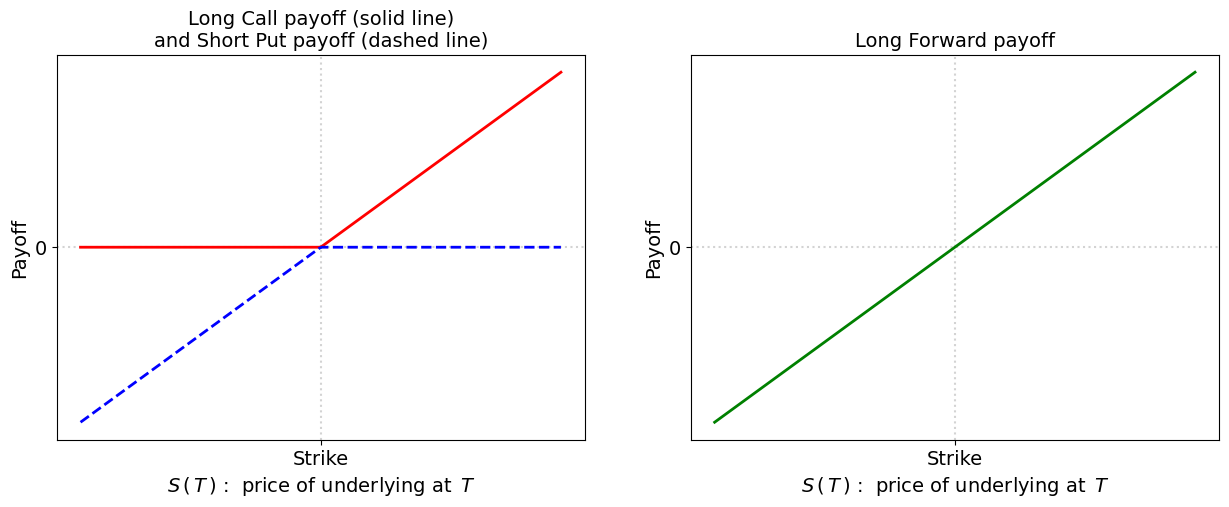

In [4]:
import numpy as np
import matplotlib.pyplot as plt

FONTSIZE = 14
FONTSIZE_BIG = 14
LINEWIDTH = 2
TICKS_FONTSIZE = 14
STRIKE = 1.0   # strike price
YLIM = (-1.1 * STRIKE, 1.1 * STRIKE)


def plot_put_call_parity():
    """
    Plot payoffs. Left: Long Call and Short Put, right: Long Forward.
    """

    underlying_values = np.linspace(0.0, 2.0 * STRIKE, num=200)
    long_call_payoff = [0.0 if S < STRIKE else S - STRIKE for S in underlying_values]
    short_put_payoff = np.array([S - STRIKE if S < STRIKE else 0.0 for S in underlying_values])
    long_forward_payoff = [S - STRIKE for S in underlying_values]

    fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
    for xtick_ytick in ['xtick', 'ytick']:
        plt.rc(xtick_ytick, labelsize=TICKS_FONTSIZE)

    # Long Call payoff and Short Put payoff
    ax = axes[0]
    ax.axhline(0, c='lightgray', ls='dotted')
    ax.axvline(STRIKE, c='lightgray', ls='dotted')
    ax.plot(underlying_values, long_call_payoff, 'r-', linewidth=LINEWIDTH)
    ax.plot(underlying_values, short_put_payoff, 'b--', linewidth=LINEWIDTH)
    ax.set_xticks([STRIKE])
    ax.set_xticklabels(['Strike'])
    ax.set_yticks([0])
    ax.set_yticklabels(['0'])
    ax.set_xlabel(r'$S\,\left(\,T\,\right)$ :  price of underlying at $\,T\,$', fontsize=FONTSIZE)
    ax.set_ylabel(r'Payoff', fontsize=FONTSIZE)
    ax.set_title('Long Call payoff (solid line)\nand Short Put payoff (dashed line)', fontsize=FONTSIZE_BIG)
    ax.set_ylim(YLIM)

    # Long Forward Payoff
    ax = axes[1]
    ax.axhline(0, c='lightgray', ls='dotted')
    ax.axvline(STRIKE, c='lightgray', ls='dotted')
    ax.plot(underlying_values, long_forward_payoff, color='g', linewidth=LINEWIDTH)
    ax.set_xticks([STRIKE])
    ax.set_xticklabels(['Strike'])
    ax.set_yticks([0])
    ax.set_yticklabels(['0'])
    ax.set_xlabel(r'$S\,\left(\,T\,\right)$ :  price of underlying at $\,T\,$', fontsize=FONTSIZE)
    ax.set_ylabel(r'Payoff', fontsize=FONTSIZE)
    ax.set_title('Long Forward payoff', fontsize=FONTSIZE_BIG)
    ax.set_ylim(YLIM)

    plt.show()


plot_put_call_parity()

### Contango and Backwardation

<span style="font-weight:bold;color:red;background-color:yellow">TODO: futures price compared to current spot or expected spot $\,\rightarrow\,$ explain $\,\rightarrow\,$ practical examples in trading , arbitrage examples </span>

### Greeks

A `Greek` is a `(mathematical) partial derivative` of the `PV` of a financial product
<br/>
with respect to 
one of the variables of the PV, for example, the price of the underlying asset.

Many of these partial derivatives are named with letters from the Greek alphabet, for example, $\,\Delta\,$ and $\,\sigma\,$.

The most frequently used Greek is $\,\Delta\,$, which is the partial derivative with respect to the underlying security's spot price.<br/>
For example, if the spot price of sugar is $\,S\,$, and a specific `financial derivative` of sugar costs $\,f\left(\,S\,\right)\,$,<br/>
then the current $\,\Delta\,$ of the given derivative financial product is 
$\,\displaystyle{\Delta=\frac{\partial\,f}{\partial\,S}}\,$.